# Imports

In [1]:
from pprint import pprint
from IPython.display import display
from hamilton import driver

import pyarrow as pa
import __init__ as lancedb_vdb

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


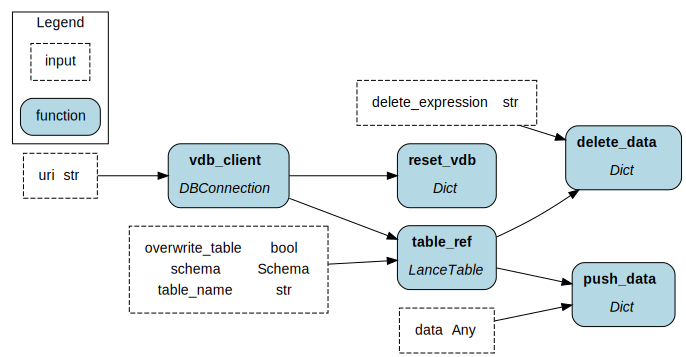

In [2]:
dr = (
    driver.Builder()
    .with_modules(lancedb_vdb)
    .build()
)

display(dr.display_all_functions(None))

In [3]:
final_vars = ["push_data"]

inputs = dict(
    table_name="demo_table",
    schema=pa.schema([
        ("source_id", pa.int64()),
        ("source", pa.string()),
        ("vector", pa.list_(pa.float32(), 4)),
    ]),
    data=[
        {"source_id": 0, "source": "Google Search", "vector": [0., 2., 11., 22.]},
        {"source_id": 1, "source": "Bing Search", "vector": [11., 23., 2., 87.]}
    ],
)

res = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
)

pprint(list(res.keys()), width=1)

['push_data']


In [4]:
display(
    res["push_data"],
    res["push_data"]["table"].to_pandas(),
)

{'table': LanceTable(demo_table), 'n_rows_added': 2}

,source_id,source,vector
0,0,Google Search,"[0.0, 2.0, 11.0, 22.0]"
1,1,Bing Search,"[11.0, 23.0, 2.0, 87.0]"
